# *Challenge 1*: A **kernel** methods / **DL** pipeline for the FashionMNIST dataset

Advanced Topics in Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/notebooks/AdvML_Challenge_1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


In [80]:
#Load libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm import tqdm

class Bcolor:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


During this first *challenge* of the *Advanced Machine Learning Course*, you will experiment with the development of a data analysis pipeline based upon various techniques seen during the lectures so far: some **unsupervised** (*e.g.* *PCA*, *kernel-PCA*) and some others **supervised** (*e.g.* *kernel SVM* and *Artificial Neural Networks* for classification).

### The dataset

The dataset of interest for the *challenge* will be [*FashionMNIST*](https://github.com/zalandoresearch/fashion-mnist), an *MNIST*-like dataset of grayscale images of fashion items. Originally developed by Zalando Research in 2017 as a harder (yet *drop-in* compatible) replacement for the original *MNIST* dataset, it has been used in several papers and competitions since then.

Remember to consider the *dataset* mentioned below as the **training set** offered by *FashionMNIST*. Use the *test set* only at the end, to evaluate the overall accuracy of the pipeline!

In [82]:
# Load the Fashion MNIST dataset
from torchvision import datasets, transforms
train_data_th = datasets.FashionMNIST('data', train=True, download=True, transform=transforms.ToTensor())
# select only 30000 images randomly with the respective labels
# set the seed 
np.random.seed(42)
idx = np.random.choice(60000, 40000, replace=False)
train_data_th.data = train_data_th.data[idx]
train_data_th.targets = train_data_th.targets[idx]

## get test data 
test_data_th = datasets.FashionMNIST('data', train=False, download=True, transform=transforms.ToTensor())


In [83]:
# convert the data to numpy arrays
# Convert the all the training data into a numpy array
train_data_np = np.array([data[0].numpy() for data in train_data_th])
labels_np = np.array([data[1] for data in train_data_th])

# Reshape the numpy array to 2D
train_data_np = train_data_np.reshape(train_data_np.shape[0], -1)

# transform tensor to numpy
test_data_np = np.array([i[0].numpy() for i in test_data_th])
test_labels_np = np.array([i[1] for i in test_data_th])

### Section 1: Understanding data geometry

Load the dataset in the most suitable form for the tasks that follow. Then, perform the following steps, with the goal of developing a geometric understanding of the dataset:

1. Perform a (linear) *PCA* on the dataset, and plot the first two (or three!) principal components along with the true label. Comment on data separation.

2. Perform a *kernel-PCA* on the dataset with a Gaussian kernel, and plot the first two (or three!) principal components along with the true label. Try to tune the dispersion parameter of the kernel to obtain a good separation of the data. Comment.

3. Perform another *kernel-PCA* on the dataset with another kernel of your own choice, and plot the first two (or three!) principal components along with the true label. Try to tune the degree of the polynomial kernel to obtain a good separation of the data. Comment.

Whenever suitable, try to complement your analysis with some graphs!

### __Load Data__ 

### __Linear PCA__ 

Perform PCA:

In [32]:
# Perform PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Fit the PCA fnn to the data
pca.fit(train_data_np)

# Transform the data
train_data_pca = pca.transform(train_data_np)

Explore the data:

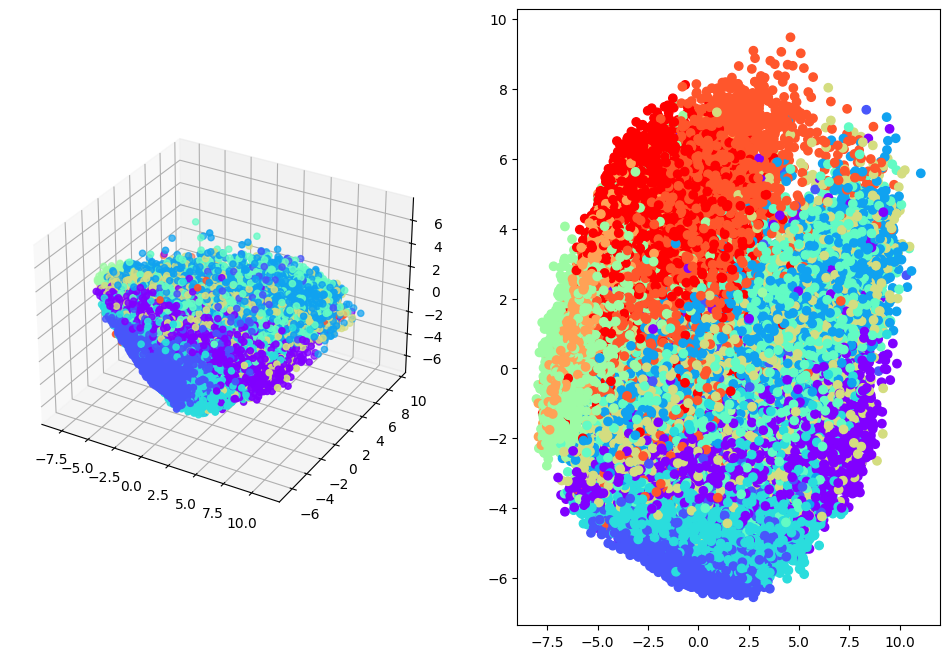

In [33]:
# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_pca[:,0], train_data_pca[:,1], train_data_pca[:,2], c=labels_np, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_pca[:,0], train_data_pca[:,1], c=labels_np, cmap='rainbow')
plt.show()


A more interactive plot:

In [7]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_pca[:,0], y=train_data_pca[:,1], z=train_data_pca[:,2], mode='markers', marker=dict(size=2, color=labels_np, colorscale='rainbow', opacity=0.8))])
fig.show()


### __Kernel PCA__ 

In [5]:
# Perform PCA with gaussian kernel
from sklearn.decomposition import KernelPCA
# select random 40000 samples  and labels from the training data to reduce the computation time
random_indices = np.random.choice(train_data_np.shape[0], 10000)
limited_train_data, limited_labels = train_data_np[random_indices], labels_np[random_indices]

kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.085)
train_data_kpca = kpca.fit_transform(limited_train_data)

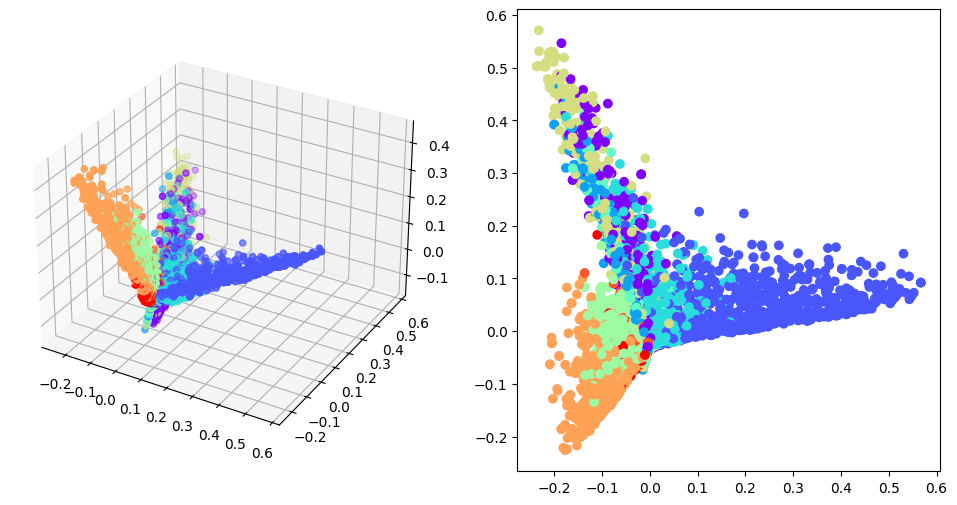

In [9]:
# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], train_data_kpca[:,2], c=limited_labels, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], c=limited_labels, cmap='rainbow')
plt.show()

In [ ]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_kpca[:,0], y=train_data_kpca[:,1], z=train_data_kpca[:,2], mode='markers', marker=dict(size=2, color=limited_labels, colorscale='rainbow', opacity=0.8))])
fig.show()

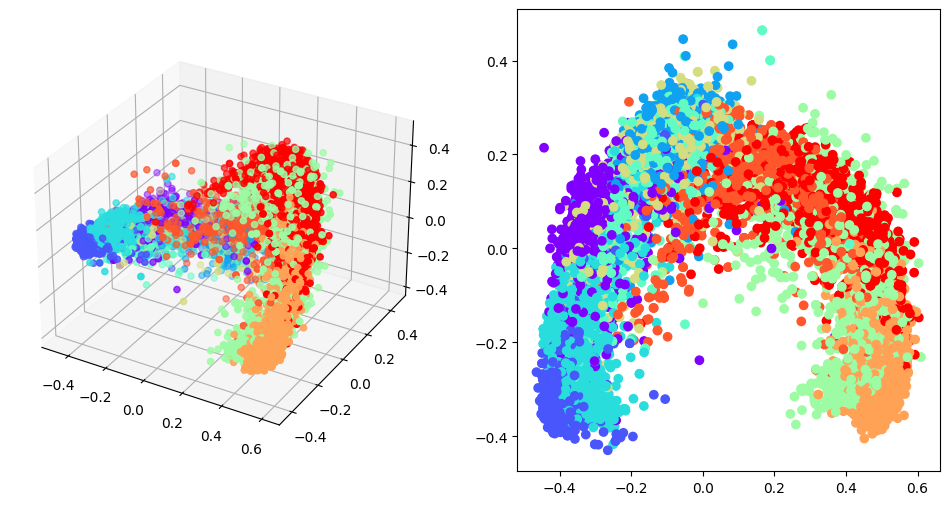

In [11]:
# try other kernels
from sklearn.decomposition import KernelPCA
# select random 40000 samples  and labels from the training data to reduce the computation time
random_indices = np.random.choice(train_data_np.shape[0], 10000)
limited_train_data, limited_labels = train_data_np[random_indices], labels_np[random_indices]

kpca = KernelPCA(n_components=3, kernel='cosine', gamma=0.08)
train_data_kpca = kpca.fit_transform(limited_train_data)

# plot side by side the 3d plot and the 2d plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], train_data_kpca[:,2], c=limited_labels, cmap='rainbow')
ax = fig.add_subplot(122)
ax.scatter(train_data_kpca[:,0], train_data_kpca[:,1], c=limited_labels, cmap='rainbow')
plt.show()


In [6]:
# Plot 3d plot with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=train_data_kpca[:,0], y=train_data_kpca[:,1], z=train_data_kpca[:,2], mode='markers', marker=dict(size=2, color=limited_labels, colorscale='rainbow', opacity=0.8))])
fig.show()

### Section 2: Bridging *unsupervised* and *supervised*

Choose one of the results obtained in the previous section (you should choose the one better explaining data geometry), and ignore the true labels. Then, perform the following steps:

1. Considering only the first $10$ components of the *(kernel-)PCA* and try to assign $10$ labels to the resulting datapoints. Choose the approach you deem most suitable. Comment on the results, by considering:
    
    a. How well does the label-assignment just performed reflect the true labels?

    b. Does the number of components used ($10$) reflect the actual *knee-* or *gap-* *point* of the spectrum associated to the principal components?

Whenever suitable, try to complement your analysis with some graphs!

In [34]:

def map_kmeans_labels(kmeans_labels, true_labels):
    """
    Maps the KMeans labels to the same order as the true labels.
    """
    unique_labels = np.unique(kmeans_labels)
    label_map = {}
    for label in unique_labels:
        mask = (kmeans_labels == label)
        true_label_counts = np.bincount(true_labels[mask])
        true_label = np.argmax(true_label_counts)
        label_map[label] = true_label
    mapped_labels = np.array([label_map[label] for label in kmeans_labels])
    return mapped_labels, label_map

def perform_clustering_and_plot(data, labels, kmeans, fit="true"):
    """
    Performs KMeans clustering on the data and plots the results.
    """
    
    if fit == "true":
        kmeans.fit(data)
        mapped_labels, label_map = map_kmeans_labels(kmeans.labels_, labels)
        unmpapped_labels = kmeans.labels_
    else:
        unmpapped_labels = kmeans.predict(data)
        mapped_labels, label_map = map_kmeans_labels(unmpapped_labels, labels)

    # print the accuracy
    print('Accuracy: {:.2f}%'.format(np.mean(mapped_labels == labels) * 100))

    # plot the point in 2D space with the mapped labels vs the true labels and add title
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(121)
    ax.scatter(data[:,0], data[:,1], c=mapped_labels, cmap='rainbow')
    ax.set_title('Mapped Labels')
    ax = fig.add_subplot(122)
    ax.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')
    ax.set_title('True Labels')
    plt.show()

    # print in 3D space with the mapped labels vs the true labels and add title
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=mapped_labels, cmap='rainbow')
    ax.set_title('Mapped Labels')
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, cmap='rainbow')
    ax.set_title('True Labels')
    plt.show()
    return mapped_labels, unmpapped_labels, label_map



#### __Assigning labels with linear PCA__

In [35]:
# perform linear PCA on the data
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
pca = PCA(n_components=10)
kmeans = KMeans(n_clusters=10)
# Fit the PCA model to the data
pca.fit(train_data_np)
train_data_pca = pca.transform(train_data_np)

/home/francesco/anaconda3/envs/ATML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Accuracy: 56.52%


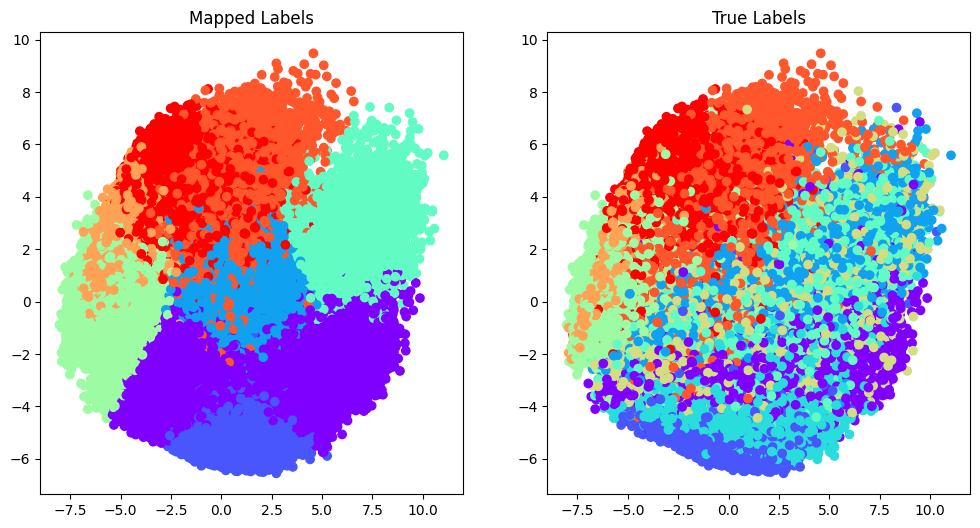

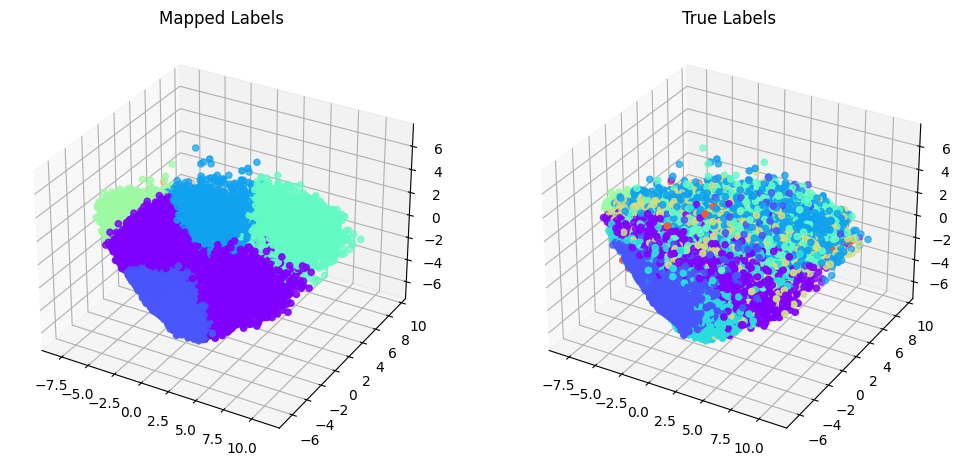

In [36]:
mapped_labels, unmapped_labels, label_map = perform_clustering_and_plot(train_data_pca, labels_np, kmeans)

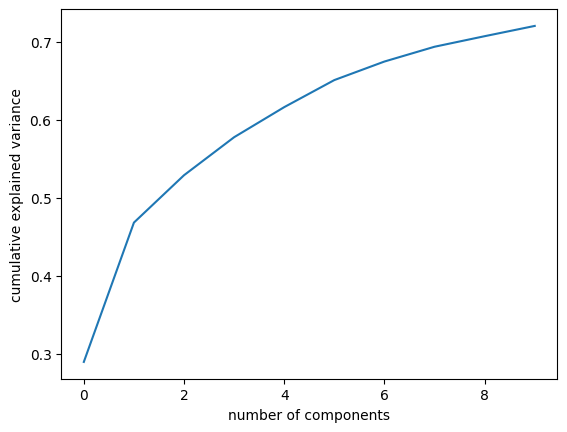

In [31]:
# plot the cumulative sum of the eigenvalues
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#### __Assigning labels with Kernel PCA with cosine__

In [10]:
from sklearn.decomposition import KernelPCA
import joblib

load = True  # Better to load. The computation is ~ 12 minutes on my laptop and 15 GB RAM used (i7-12700H CPU @ 4.50GHz)

if load == False:
    kpca = KernelPCA(n_components=10, kernel='cosine', gamma=0.085)
    train_data_kpca_cosine = kpca.fit_transform(train_data_np)
    # save train_data_kpca 
    np.save('train_data_kpca_cosine.npy', train_data_kpca_cosine)
    joblib.dump(kpca, 'kpca_cosine.pkl')

else:
    # load train_data_kpca
    train_data_kpca_cosine = np.load('train_data_kpca_cosine.npy')
    kpca = joblib.load('kpca_cosine.pkl')

/home/francesco/anaconda3/envs/ATML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Accuracy: 62.21%


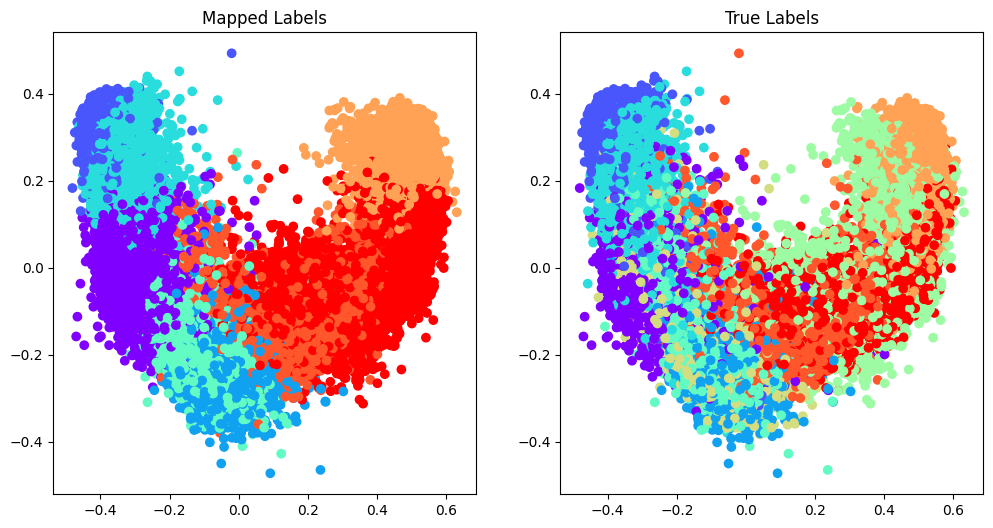

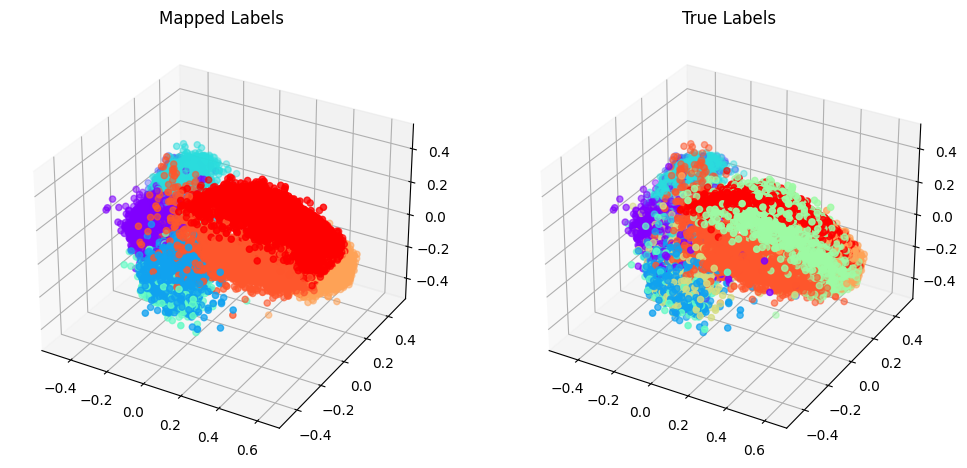

In [12]:
mapped_labels, unmappde_labels, label_map = perform_clustering_and_plot(train_data_kpca_cosine, labels_np, kmeans)

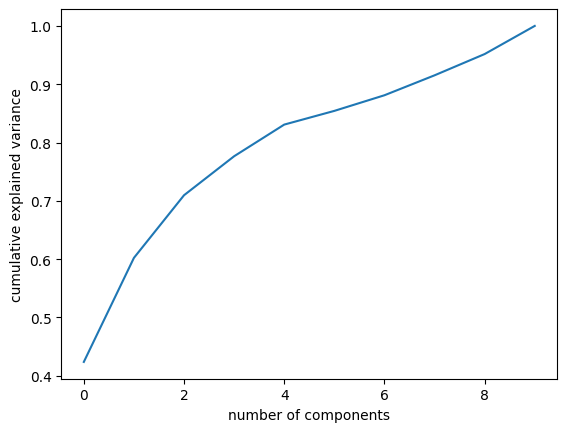

In [12]:
# calculate the explained variance ratio
# !!!! TO DO: I don't know id this is correct

covariance_matrix = np.cov(train_data_kpca_cosine.T)

# calculate the explained variance ratio
eigvals = np.linalg.eigvals(covariance_matrix)
explained_variance_ratio = eigvals / sum(eigvals)

# plot the cumulative sum of explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


### Section 3: (Supervised) classification

Consider the dataset composed of the original images, with the label assigned in the previous section (regardless of its actual match with the true label!). Then, define and learn a classifier that can predict the label of a new image. Speficically:

1. Learn a *kernel-SVM* on the data/label pairs. The choice of the kernel and its hyperparameters is up to your experimentation and time availability. Comment on your choices and results.

2. Learn a *fully-connected NN* on the data/label pairs. The choice of the architecture and its hyperparameters is up to your experimentation and time availability: show at least two different hyperparameter configurations, and comment on the results.

3. Learn a *CNN* on the data/label pairs. The choice of the architecture and its hyperparameters is up to your experimentation and time availability. Comment on the results with special respect to the FCN architecture.

In [61]:
def split_data(train_data_np, unmapped_labels, labels_np):
    if unmapped_labels is None:
        unmapped_labels = labels_np
    n = len(train_data_np)
    train_data = train_data_np[:int(n*0.8)]
    eval_data = train_data_np[int(n*0.8):]
    train_labels = unmapped_labels[:int(n*0.8)]
    eval_labels = unmapped_labels[int(n*0.8):]
    real_labels = labels_np[int(n*0.8):]
    return train_data, eval_data, train_labels, eval_labels, real_labels

#### __Kernel SVM__

In [38]:
# create train and evaluation data using np data along with the mapped labels
from sklearn.model_selection import train_test_split

train_data, eval_data, train_labels, eval_labels, real_labels = split_data(train_data_np, unmapped_labels, labels_np)

In [39]:
# linear SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# create the model
svm = LinearSVC(C=1.0)

# fit the fnn
svm.fit(train_data, train_labels)

# predict on the evaluation data
eval_pred = svm.predict(eval_data)

# print the accuracy
print('Accuracy: {:.2f}%'.format(accuracy_score(eval_labels, eval_pred) * 100))


Accuracy: 90.62%


/home/francesco/anaconda3/envs/ATML/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [15]:
# gaussian SVM
from sklearn.svm import SVC

# create the model
svm = SVC(C=1.0, gamma=0.085)

# fit the model
svm.fit(train_data, train_labels)

# predict on the evaluation data
eval_pred = svm.predict(eval_data)

# print the accuracy
print('Accuracy: {:.2f}%'.format(accuracy_score(eval_labels, eval_pred) * 100))

Accuracy: 95.18%


#### __Fully Connected NN__

In [40]:
# create train and evaluation data using np data along with the mapped labels but with torch tensors
from sklearn.model_selection import train_test_split
train_data, eval_data, train_labels, eval_labels,  real_labels = split_data(train_data_np, unmapped_labels, labels_np)

# convert to torch tensors
train_data = torch.from_numpy(train_data).float()
eval_data = torch.from_numpy(eval_data).float()
train_labels = torch.from_numpy(train_labels).long()
eval_labels = torch.from_numpy(eval_labels).long()

In [77]:
## create a fully connected neural network with 3 hidden layers
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [42]:
# create train loop for the neural network using cuda

def train(model, train_loader, optimizer, criterion, device, epoch):
    model.train()
    saved_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # save the loss each 20 batches
        if batch_idx % 20 == 0:
            saved_loss.append(loss.item())

    return saved_loss

    
   
# create evaluation loop for the neural network using cuda
def evaluate(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy



In [43]:
# train the neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


fnn = FNN()

# create the optimizer
optimizer = optim.Adam(fnn.parameters(), lr=0.001, weight_decay=1e-5)

# create the loss function
criterion = nn.CrossEntropyLoss()

# create the dataset
train_dataset = TensorDataset(train_data, train_labels)
eval_dataset = TensorDataset(eval_data, eval_labels)

# create the data loader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

# train the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
fnn.to(device)

total_loss = []
total_accuracy = []
total_per_batch_loss = []
total_train_loss = []
total_train_accuracy = []
for epoch in range(15):
    per_batch_loss = train(fnn, train_loader, optimizer, criterion, device, epoch)
    train_loss, train_accuracy = evaluate(fnn, train_loader, criterion, device)
    test_loss, test_accuracy = evaluate(fnn, eval_loader, criterion, device)
    print('Epoch: {}, Train Loss: {:.4f}, Train Accuracy: {:.2f}% Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch, train_loss, train_accuracy, test_loss, test_accuracy))
    # save loss and accuracy for plotting
    total_loss.append(test_loss)
    total_accuracy.append(test_accuracy)
    total_train_loss.append(train_loss)
    total_per_batch_loss.append(per_batch_loss)
    total_train_accuracy.append(train_accuracy)



Epoch: 0, Train Loss: 0.0027, Train Accuracy: 85.63% Test Loss: 0.0029, Test Accuracy: 84.48%
Epoch: 1, Train Loss: 0.0017, Train Accuracy: 91.77% Test Loss: 0.0020, Test Accuracy: 90.13%
Epoch: 2, Train Loss: 0.0017, Train Accuracy: 90.33% Test Loss: 0.0020, Test Accuracy: 88.47%
Epoch: 3, Train Loss: 0.0012, Train Accuracy: 93.38% Test Loss: 0.0015, Test Accuracy: 91.95%
Epoch: 4, Train Loss: 0.0009, Train Accuracy: 95.23% Test Loss: 0.0012, Test Accuracy: 93.10%
Epoch: 5, Train Loss: 0.0008, Train Accuracy: 95.85% Test Loss: 0.0011, Test Accuracy: 93.72%
Epoch: 6, Train Loss: 0.0011, Train Accuracy: 94.00% Test Loss: 0.0014, Test Accuracy: 91.83%
Epoch: 7, Train Loss: 0.0023, Train Accuracy: 88.60% Test Loss: 0.0028, Test Accuracy: 87.38%
Epoch: 8, Train Loss: 0.0009, Train Accuracy: 95.20% Test Loss: 0.0013, Test Accuracy: 93.22%
Epoch: 9, Train Loss: 0.0015, Train Accuracy: 92.03% Test Loss: 0.0021, Test Accuracy: 89.97%
Epoch: 10, Train Loss: 0.0007, Train Accuracy: 96.49% Test L

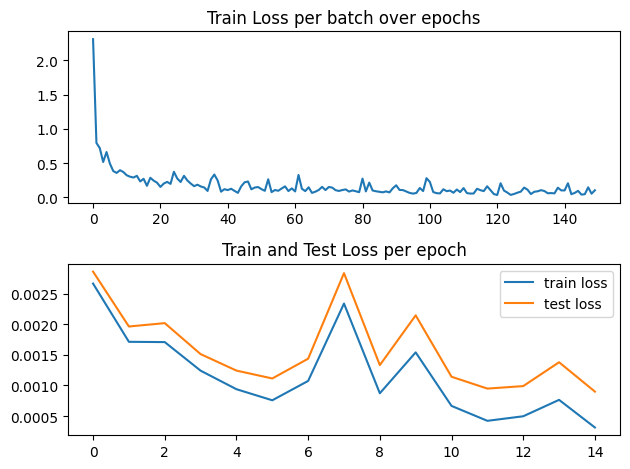

In [44]:
# check if is a list of lists
if isinstance(total_per_batch_loss[0], list):
    total_per_batch_loss = [ item for elem in total_per_batch_loss for item in elem]
# Plot 1 - Train Loss per batch over epochs
plt.subplot(211)
plt.plot(total_per_batch_loss)
plt.title('Train Loss per batch over epochs')

# Plot 2 - Train and Test Loss per epoch

plt.subplot(212)
plt.plot(total_train_loss, label='train loss')
plt.plot(total_loss, label='test loss')
plt.title('Train and Test Loss per epoch')
plt.legend()


# Display the figure
plt.tight_layout()
plt.show()


#### __CNN__

In [46]:
## reshape the data from 1x784 to 1x28x28
train_data = train_data.view(-1, 1, 28, 28)
eval_data = eval_data.view(-1, 1, 28, 28)

In [47]:

import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, 1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # dropout layer
        self.dropout = nn.Dropout(0.5)

        self.out = nn.Linear(2304, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.dropout(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)
        output = F.log_softmax(output, dim=1)
        return output




In [48]:
cnn = CNN()

# create the optimizer
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

# create the loss function
criterion = nn.CrossEntropyLoss()

# create the dataset
train_dataset = TensorDataset(train_data, train_labels)
eval_dataset = TensorDataset(eval_data, eval_labels)

# create the data loader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=128, shuffle=False)

# train the cnn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn.to(device)

total_loss = []
total_accuracy = []
total_per_batch_loss = []
total_train_loss = []
total_train_accuracy = []
for epoch in range(15):
    per_batch_loss = train(cnn, train_loader, optimizer, criterion, device, epoch)
    train_loss, train_accuracy = evaluate(cnn, train_loader, criterion, device)
    test_loss, test_accuracy = evaluate(cnn, eval_loader, criterion, device)
    print('Epoch: {}, Train Loss: {:.4f}, Train Accuracy: {:.2f}% Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch, train_loss, train_accuracy, test_loss, test_accuracy))
    # save loss and accuracy for plotting
    total_loss.append(test_loss)
    total_accuracy.append(test_accuracy)
    total_train_loss.append(train_loss)
    total_per_batch_loss.append(per_batch_loss)
    total_train_accuracy.append(train_accuracy)



Epoch: 0, Train Loss: 0.0010, Train Accuracy: 95.33% Test Loss: 0.0011, Test Accuracy: 94.90%
Epoch: 1, Train Loss: 0.0008, Train Accuracy: 96.34% Test Loss: 0.0009, Test Accuracy: 95.87%
Epoch: 2, Train Loss: 0.0007, Train Accuracy: 96.44% Test Loss: 0.0008, Test Accuracy: 95.60%
Epoch: 3, Train Loss: 0.0008, Train Accuracy: 95.65% Test Loss: 0.0009, Test Accuracy: 95.45%
Epoch: 4, Train Loss: 0.0006, Train Accuracy: 96.91% Test Loss: 0.0007, Test Accuracy: 96.05%
Epoch: 5, Train Loss: 0.0006, Train Accuracy: 96.76% Test Loss: 0.0007, Test Accuracy: 96.02%
Epoch: 6, Train Loss: 0.0007, Train Accuracy: 96.00% Test Loss: 0.0009, Test Accuracy: 95.37%
Epoch: 7, Train Loss: 0.0006, Train Accuracy: 97.04% Test Loss: 0.0007, Test Accuracy: 96.23%
Epoch: 8, Train Loss: 0.0006, Train Accuracy: 97.00% Test Loss: 0.0007, Test Accuracy: 96.15%
Epoch: 9, Train Loss: 0.0005, Train Accuracy: 97.47% Test Loss: 0.0006, Test Accuracy: 96.93%
Epoch: 10, Train Loss: 0.0004, Train Accuracy: 98.08% Test L

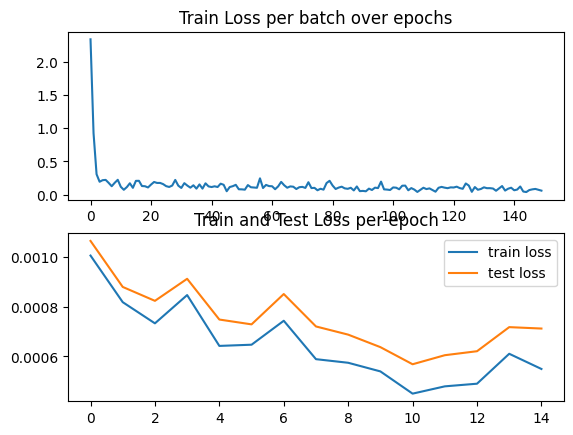

In [49]:
# check if is a list of lists
if isinstance(total_per_batch_loss[0], list):
    total_per_batch_loss = [ item for elem in total_per_batch_loss for item in elem]
# Plot 1 - Train Loss per batch over epochs
plt.subplot(211)
plt.plot(total_per_batch_loss)
plt.title('Train Loss per batch over epochs')

# Plot 2 - Train and Test Loss per epoch
plt.subplot(212)
plt.plot(total_train_loss, label='train loss')
plt.plot(total_loss, label='test loss')
plt.title('Train and Test Loss per epoch')
plt.legend()


### Section 4: Wrap-up!

Evaluate the overall accuracy of the pipeline on the *test set* of *FashionMNIST*. *I.e.* compare the predicted labels from the three classifiers built in *Section 3* with the true labels.

In order to assign a true label *name* (e.g. *trousers*, *sandal*, ...) to those determined just from *(kernel-)PCA* (that obviously carry no direct information about the subject of the picture), you can either:

i. *Cheat* and use the most abundant labels for each group of *(kernel-)PCA-labelled* datapoints.

ii. Sample a subset of datapoints from each *(kernel-)PCA-labelled* class, and assign one label by direct visual inspection. If you choose this route, it may also serve as a reminder of the fact that *expert labelling* is not always a trivial (and almost never a fast) task!

Comment on the results obtained.

#### __Analysis of the mapped labels__

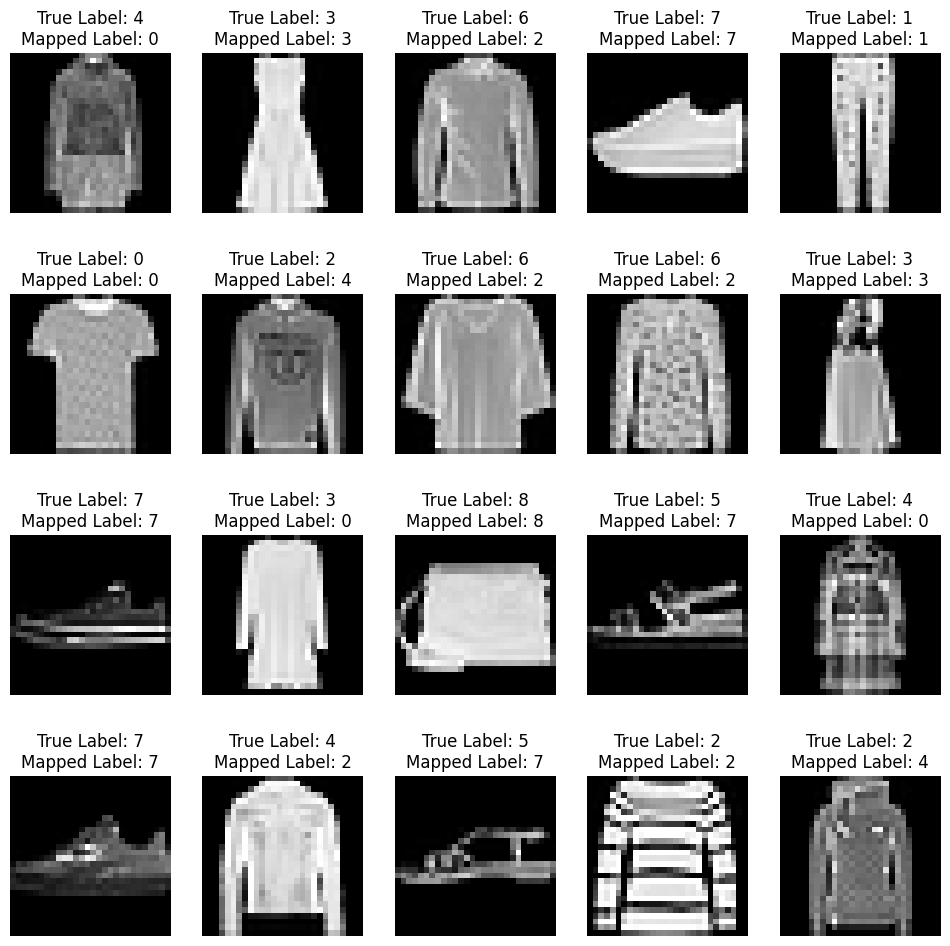

In [25]:
# same as before but plot a grid of 20 images
fig = plt.figure(figsize=(12,12))
# get random 20 indexs
idxs = np.random.randint(0, len(train_data_np), 20)
for j, i in enumerate(idxs):
    ax = fig.add_subplot(4,5,j+1)
    ax.imshow(train_data_np[i].reshape(28,28), cmap='gray')
    ax.set_title('True Label: {}\nMapped Label: {}'.format(labels_np[i], mapped_labels[i]))
    ax.axis('off')
plt.show()

#### __Accuracy between predicted labels and true labels__

In [55]:
def pipeline(test_data_np, test_labels_np, map_labels = True):

    # flatten the data
    test_data_np = test_data_np.reshape(test_data_np.shape[0], -1)



    # get the prediction
    test_pred_svm = svm.predict(test_data_np)

    # same for the fnn
    # test_data_np to torch tensor
    test_data = torch.from_numpy(test_data_np).float()

    test_pred_fnn = fnn(test_data.to(device))
    test_pred_fnn = test_pred_fnn.argmax(dim=1, keepdim=True)
    test_pred_fnn = test_pred_fnn.cpu().numpy()
    # reshape the predictions
    test_pred_fnn = test_pred_fnn.reshape(-1)



    torch.cuda.empty_cache()

    # same for the cnn
    test_data = test_data.view(-1, 1, 28, 28)

    with torch.no_grad():
        cnn.eval()
        test_pred_cnn = cnn(test_data.to(device))
    test_pred_cnn = test_pred_cnn.argmax(dim=1, keepdim=True)
    test_pred_cnn = test_pred_cnn.cpu().numpy()
    # reshape the predictions
    test_pred_cnn = test_pred_cnn.reshape(-1)

    if map_labels:
        # map the labels back to the original
        test_pred_svm = [label_map[i] for i in test_pred_svm]
        test_pred_fnn = [label_map[i] for i in test_pred_fnn]
        test_pred_cnn = [label_map[i] for i in test_pred_cnn]


    # print the accuracy eval_pred vs mapped eval labels
    print('SVM Accuracy: {:.2f}%'.format(accuracy_score(test_pred_svm, test_labels_np) * 100))
    print('FNN Accuracy: {:.2f}%'.format(accuracy_score(test_pred_fnn, test_labels_np) * 100))
    print('CNN Accuracy: {:.2f}%'.format(accuracy_score(test_pred_cnn, test_labels_np) * 100))

    return 


In [56]:
#free cuda memory
torch.cuda.empty_cache()

pipeline(test_data_np, test_labels_np)

SVM Accuracy: 58.53%
FNN Accuracy: 57.34%
CNN Accuracy: 57.31%


### Section 5: A *fully-supervised* approach

Repeat the steps of *Section 3* using the true labels of the dataset. Comment on the results, and draw a comparison between such results and those obtained from the previous *hybrid* pipeline.

In [84]:
def train_all_and_evaluate(train_data_np, labels_np,  test_data_np, test_labels_np):

    # flatten the data
    test_data_np = test_data_np.reshape(test_data_np.shape[0], -1)

    # split in order to train with the same amount of data (and the same data too)
    train_data, _ , train_labels, _, _ = split_data(train_data_np, unmapped_labels = None,  labels_np = labels_np,)

    ## SVM
    print('Training SVM...')
    svm.fit(train_data, train_labels)
    svm_preds = svm.predict(test_data_np)

    ##### ANNs

    # train_data_np to torch tensor
    train_data = torch.from_numpy(train_data).float()
    train_labels = torch.from_numpy(train_labels).long()
    test_data = torch.from_numpy(test_data_np).float()

    # create the dataset
    train_dataset = TensorDataset(train_data, train_labels)
    
    # create the data loader
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    ## FNN
    fnn = FNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(fnn.parameters(), lr=0.001)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    fnn.to(device)
    fnn.train()
    for epoch in tqdm(range(15), desc='FNN Training') :
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            output = fnn(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

    fnn.eval()
    with torch.no_grad():
        fnn_preds = fnn(test_data.to(device))
    fnn_preds = fnn_preds.argmax(dim=1, keepdim=True)
    fnn_preds = fnn_preds.cpu().numpy()
    # reshape the predictions
    fnn_preds = fnn_preds.reshape(-1)

    ## CNN
    # empty cuda memory
    torch.cuda.empty_cache()

    # reshape the data
    train_data = train_data.view(-1, 1, 28, 28)
    test_data = test_data.view(-1, 1, 28, 28)

    # create the dataset
    train_dataset = TensorDataset(train_data, train_labels)
    
    # create the data loader
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

    cnn = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=0.001)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    cnn.to(device)
    cnn.train()
    for epoch in tqdm(range(15), desc='CNN Training'):
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            output = cnn(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
    
    cnn.eval()
    with torch.no_grad():
        cnn_preds = cnn(test_data.to(device))
    cnn_preds = cnn_preds.argmax(dim=1, keepdim=True)
    cnn_preds = cnn_preds.cpu().numpy()

    # reshape the predictions
    fnn_preds = fnn_preds.reshape(-1)

    #### EVALUATION, print the accuracy eval_pred vs mapped eval labels
    print('SVM Accuracy: {:.2f}%'.format(accuracy_score(svm_preds, test_labels_np) * 100))
    print('FNN Accuracy: {:.2f}%'.format(accuracy_score(fnn_preds, test_labels_np) * 100))
    print('CNN Accuracy: {:.2f}%'.format(accuracy_score(cnn_preds, test_labels_np) * 100))

    return

In [85]:
train_all_and_evaluate(train_data_np, labels_np,  test_data_np, test_labels_np)

Training SVM...


/home/francesco/anaconda3/envs/ATML/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

CNN Training: 100%|██████████| 15/15 [00:14<00:00,  1.04it/s]

SVM Accuracy: 83.65%
FNN Accuracy: 87.64%
CNN Accuracy: 90.18%



And please, avoid doing that... 👇🏻

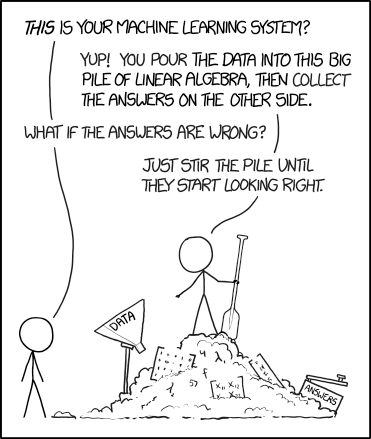